# Lectura experimental e interactiva sobre **p‑valores** en OLS



## Usando `statsmodels.formula.api (smf)` con **Python** y **LaTeX**

---



## Objetivo



Comprender **experimentalmente** el significado, cálculo e interpretación de los **p‑valores** asociados al algoritmo **Ordinary Least Squares (OLS)**, utilizando:



* Python
* `statsmodels.formula.api (smf)`
* Notación matemática en **LaTeX**
* Contextos de **datos sociales y estratificación**

---



## 1. Marco teórico mínimo (con LaTeX)



En un modelo de regresión lineal múltiple:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \varepsilon
$$



El estimador OLS de los coeficientes es:

$$
\hat{\boldsymbol{\beta}} = (X^T X)^{-1} X^T Y
$$



Para cada coeficiente $\beta_j$, el contraste de hipótesis es:

$$
H_0: \beta_j = 0 \quad \text{vs.} \quad H_1: \beta_j \neq 0
$$



El **p‑valor** se define como:

$$
\text{p‑valor} = P(|T_j| \ge |t_j^{obs}| \mid H_0)
$$

---


Una **interpretación verbal clara y rigurosa** de la fórmula es la siguiente:

> El **p-valor** es la **probabilidad**, **suponiendo que la hipótesis nula (H_0) es verdadera**, de observar un valor del estadístico de prueba (T_j) **tan extremo o más extremo** (en valor absoluto) que el valor realmente observado (t_j^{obs}).

Dicho de manera más pedagógica, paso a paso:

* **“Suponiendo que (H_0) es verdadera”**
  Aceptamos provisionalmente que el coeficiente poblacional es cero (no hay efecto real).

* **“Probabilidad”**
  El p-valor no es una certeza, sino una medida de **evidencia estadística**.

* **“Observar un estadístico (T_j)”**
  (T_j) mide cuántas desviaciones estándar se aleja el estimador del valor hipotético (0).

* **“Tan extremo o más extremo”**
  No solo consideramos lo que observamos, sino **resultados aún más incompatibles con (H_0)**.

* **“En valor absoluto”**
  Se consideran efectos **positivos y negativos** (prueba bilateral).

### Traducción a lenguaje cotidiano (muy útil en ciencias sociales)

> *Si en realidad no existiera efecto de esta variable, ¿qué tan probable sería obtener un resultado como el que observamos —o uno aún más extremo— solo por azar?*

* Un **p-valor pequeño** indica que el resultado observado sería **muy raro** si (H_0) fuera cierta → evidencia contra (H_0).
* Un **p-valor grande** indica que el resultado observado es **compatible** con (H_0).

### Advertencia pedagógica clave

> El p-valor **NO** es la probabilidad de que la hipótesis nula sea verdadera.

Esta distinción es crucial para formar **lectores críticos de resultados estadísticos**, especialmente en análisis de datos sociales y educativos.



# 2. Preparación del entorno


In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt




## 3. Dataset social simulado



Simulamos una encuesta social para analizar ingresos.


In [8]:
np.random.seed(123)

n = 250

df = pd.DataFrame({
    "educacion": np.random.randint(0, 20, n),
    "edad": np.random.randint(18, 65, n),
    "genero": np.random.choice(["Hombre", "Mujer"], n)
})

# Modelo generador (verdad latente)
df["ingreso"] = (
    400
    + 90 * df["educacion"]
    + 4 * df["edad"]
    + np.where(df["genero"] == "Hombre", 120, 0)
    + np.random.normal(0, 250, n)
)

df.head()


,educacion,edad,genero,ingreso
0,13,53,Hombre,1863.037714
1,2,56,Mujer,997.423585
2,2,19,Mujer,453.961157
3,6,58,Mujer,1344.100438
4,17,35,Hombre,2455.063921



# 4. Ajuste del modelo OLS


In [9]:
modelo = smf.ols(
    formula="ingreso ~ educacion + edad + genero",
    data=df
).fit()

modelo.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ingreso   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     371.4
Date:               mar, 23 dic. 2025   Prob (F-statistic):           5.15e-91
Time:                        17:12:22   Log-Likelihood:                -1731.7
No. Observations:                 250   AIC:                             3471.
Df Residuals:                     246   BIC:                             3485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         477.7013     60.270      7.926      0.000     358.991     596.412
genero[T.Mujer]  -149.1503     31.509     -4.734      0.000    -211.213     -87.088
educacion          89.0040      2.738     32.501      0.000      83.610      94.398
edad                5.3566      1.179      4.545      0.000       3.035       7.678
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.499
Skew:                           0.109   Prob(JB):                        0.779
Kurtosis:                       2.975   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


---

## 5. ¿Dónde están los p‑valores?

Extraemos explícitamente los p‑valores:


In [10]:
modelo.pvalues



Intercept          7.871073e-14
genero[T.Mujer]    3.726635e-06
educacion          5.311442e-91
edad               8.637389e-06
dtype: float64


### Interpretación conceptual

* Si **p‑valor < 0.05** → evidencia estadística contra $H_0$
* Si **p‑valor ≥ 0.05** → evidencia insuficiente



En términos sociales:

> “La variable tiene un efecto estadísticamente significativo sobre el ingreso.”

---



# 6. Experimento 1: variable irrelevante



Agregamos una variable **sin efecto real**.


In [14]:
df["ruido_social"] = np.random.normal(0, 1, len(df))

modelo_ruido = smf.ols(
    formula="ingreso ~ educacion + edad + genero + ruido_social",
    data=df
).fit()

modelo_ruido.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ingreso   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     277.5
Date:               mar, 23 dic. 2025   Prob (F-statistic):           1.02e-89
Time:                        17:18:23   Log-Likelihood:                -1731.6
No. Observations:                 250   AIC:                             3473.
Df Residuals:                     245   BIC:                             3491.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         478.7943     60.468      7.918      0.000     359.690     597.899
genero[T.Mujer]  -149.5980     31.595     -4.735      0.000    -211.831     -87.365
educacion          89.0543      2.748     32.412      0.000      83.642      94.466
edad                5.3318      1.183      4.506      0.000       3.001       7.662
ruido_social       -5.2446     15.784     -0.332      0.740     -36.334      25.845
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.415
Skew:                           0.099   Prob(JB):                        0.812
Kurtosis:                       2.972   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# Pregunta experimental

> ¿Qué ocurre con el p‑valor de `ruido_social`?

---



# 7. Experimento 2: tamaño de muestra y p‑valores


In [16]:
resultados = []

for n in [30, 60, 120, 250]:   # n <= len(df)
    sub = df.sample(n, random_state=42)
    m = smf.ols("ingreso ~ educacion", data=sub).fit()
    resultados.append({
        "n": n,
        "coef": m.params["educacion"],
        "pvalor": m.pvalues["educacion"]
    })

pd.DataFrame(resultados)



,n,coef,pvalor
0,30,94.789912,1.265419e-11
1,60,89.654529,1.838916e-21
2,120,91.954232,2.261986e-43
3,250,89.398546,4.164426e-85



# Discusión

* A mayor $n$, menor error estándar
* El p‑valor **no mide tamaño del efecto**, sino evidencia

---



## 8. Visualización del estadístico t


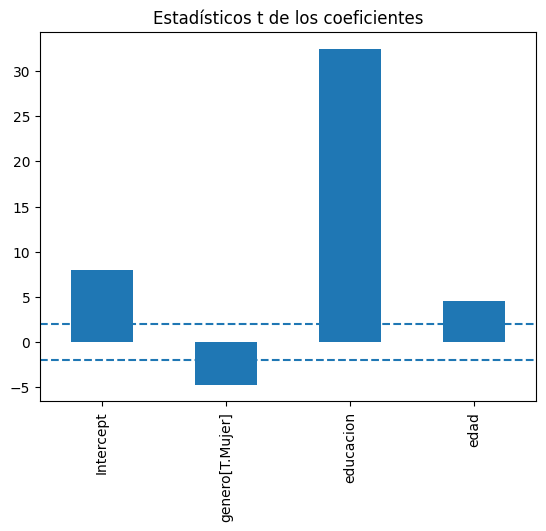

In [17]:
t_values = modelo.tvalues

t_values.plot(kind="bar")
plt.axhline(2, linestyle="--")
plt.axhline(-2, linestyle="--")
plt.title("Estadísticos t de los coeficientes")
plt.savefig(r"C:\Users\marco\Downloads\t_values.png")
plt.show()




Relación aproximada:

$$
|t| > 2 \Rightarrow p \approx 0.05
$$

---



## 9. Error común: significancia vs importancia



Ejemplo:


In [18]:
print("Coeficiente:", modelo.params["edad"])
print("p‑valor:", modelo.pvalues["edad"])



Coeficiente: 5.356584101817644
p‑valor: 8.637389350973854e-06



> Un p‑valor pequeño **no implica** impacto social grande.

---



## 10. Actividades experimentales propuestas

1. Cambia el nivel de ruido y observa los p‑valores.
2. Introduce multicolinealidad artificial.
3. Ajusta modelos estratificados por género.
4. Compara con `sklearn` (que no reporta p‑valores).

---



## 11. Cierre pedagógico

* Los p‑valores son **herramientas inferenciales**, no verdades absolutas.
* `statsmodels` permite una lectura estadística rigurosa.
* Este cuaderno conecta:



$$
\text{Matemática} ; + ; \text{Programación} ; + ; \text{Análisis social}
$$



Ideal para cursos de:

* Métodos cuantitativos
* Estadística social
* Ciencia de datos con enfoque interpretativo
